<a href="https://colab.research.google.com/github/lakus1251/Machine-learning/blob/main/Lab9_%D0%9C%D0%B0%D1%87%D0%B5%D0%B1%D1%80%D0%BE%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/mushroom_cleaned.csv'
df = pd.read_csv(file_path)

In [ ]:
print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
print("Розмір датасету (рядки, стовпці):\n", df.shape)
print("\nКількість пропущених значень у кожному стовпці:\n", df.isnull().sum())
print("\nТипи даних у кожному стовпці:\n", df.dtypes)

Розмір датасету (рядки, стовпці):
 (54035, 9)

Кількість пропущених значень у кожному стовпці:
 cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Типи даних у кожному стовпці:
 cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_with_class = correlation_matrix['class']
correlation_with_class

,class
cap-diameter,-0.165676
cap-shape,-0.133338
gill-attachment,-0.052541
gill-color,-0.063947
stem-height,0.183354
stem-width,-0.182856
stem-color,-0.128339
season,-0.082919
class,1.000000


In [ ]:
correlation_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Оцінка моделей
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Вибір найкращої моделі
best_model = rf if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr) else lr

# Метрики для найкращої моделі
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_model.predict(X_test)))

print("Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))

Random Forest Accuracy: 0.9909937696625748
Logistic Regression Accuracy: 0.6348775522793165
Confusion Matrix:
[[7278   71]
 [  75 8787]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



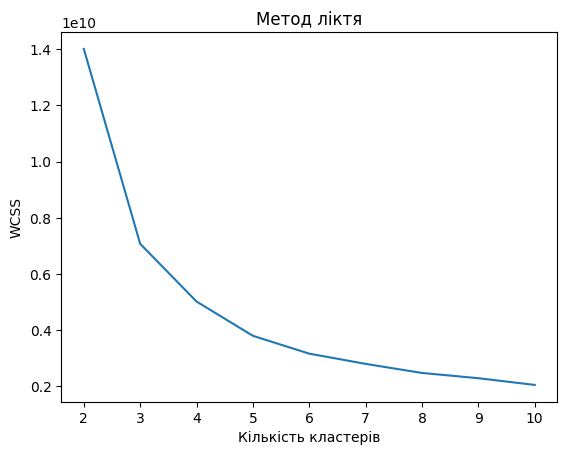

KeyboardInterrupt: 

In [14]:
import matplotlib.pyplot as plt

# Метод ліктя
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

# Метод силуетів
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels))

plt.plot(range(2, 11), sil)
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній силует')
plt.show()

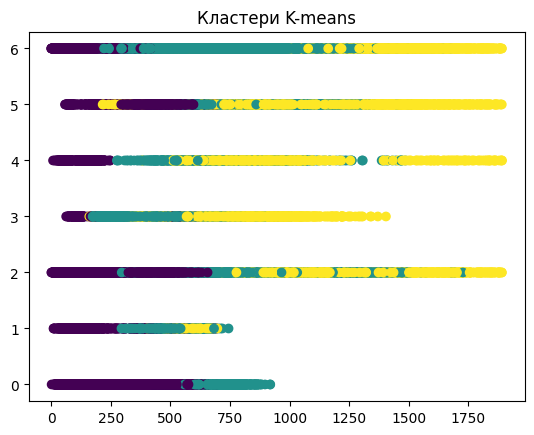

In [13]:
# Побудова моделі K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Візуалізація кластерів
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Кластери K-means')
plt.show()